In [1]:
import pandas as pd

import sys
sys.path.append("../scripts")
from preprocessing import Preprocessing
from eda import EDA

# Load the dataset
file_path = '../data/MachineLearningRating_v3.txt'
data = pd.read_csv(file_path, delimiter='|')

C:\Users\HP\AppData\Local\Temp\ipykernel_11972\1945392669.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|')


In [2]:
# Preprocessing
preprocessor = Preprocessing(data)

In [3]:
print(preprocessor.describe_numerical_columns())

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [4]:
print(preprocessor.check_data_types())

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [5]:
print(preprocessor.missing_values())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [6]:
# Fill missing values
preprocessor.fill_missing_values(method='mean')
processed_data = preprocessor.get_data()

Missing values filled using method: mean


In [7]:
# Save processed data for modeling
preprocessor.save_to_csv('../data/processed_data.csv')

Data successfully saved to ../data/processed_data.csv


In [8]:
# EDA
eda = EDA(processed_data)

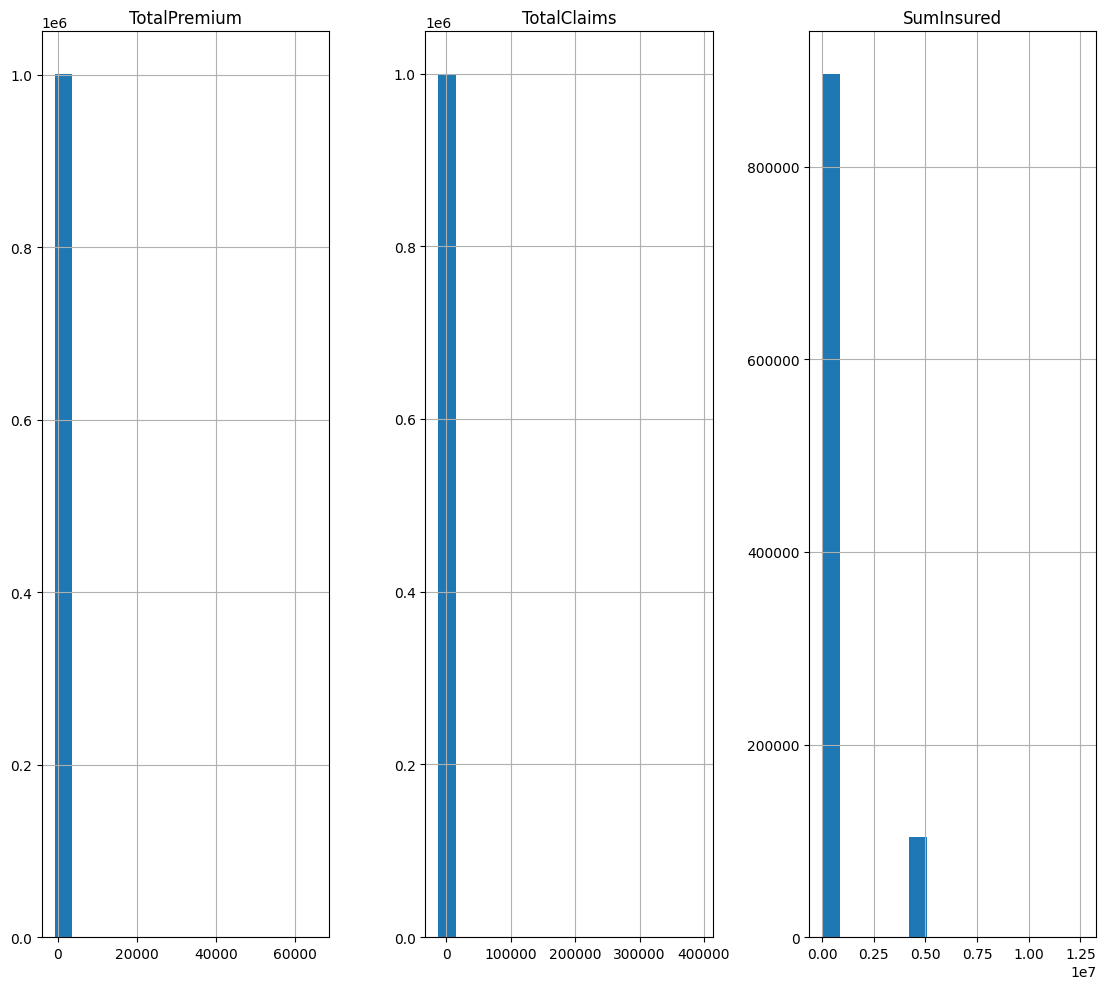

In [9]:
eda.plot_numerical_histogram(columns=['TotalPremium', 'TotalClaims', 'SumInsured'])

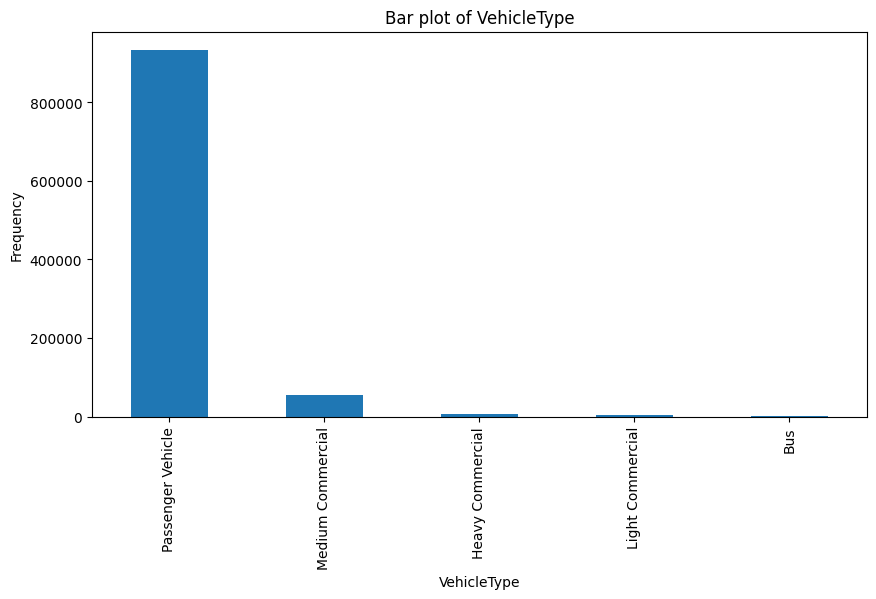

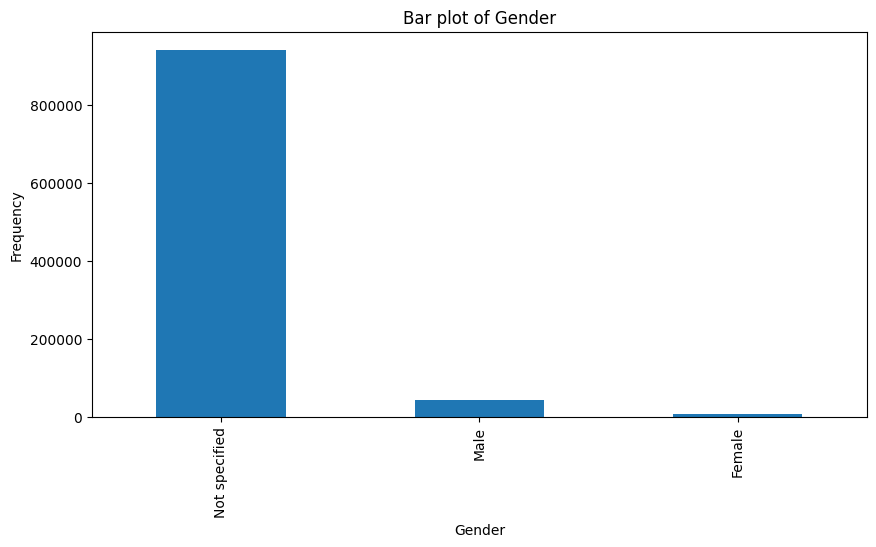

In [10]:
eda.plot_categorical_bar(columns=['VehicleType', 'Gender'])

In [11]:
eda.plot_scatter(x_col='TotalPremium', y_col='TotalClaims', hue_col='ZipCode')

Error in plot_scatter: Could not interpret value `ZipCode` for `hue`. An entry with this name does not appear in `data`.


<Figure size 1000x600 with 0 Axes>

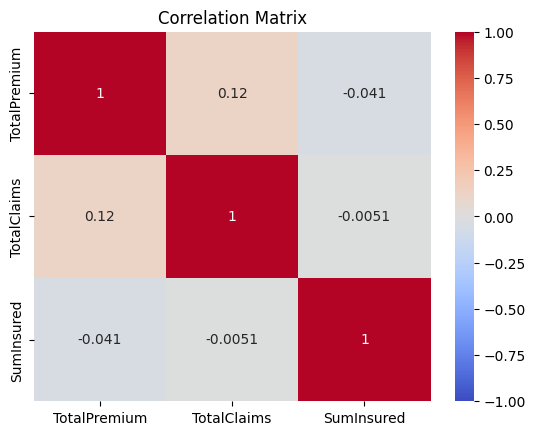

In [12]:
eda.plot_correlation_matrix(columns=['TotalPremium', 'TotalClaims', 'SumInsured'])

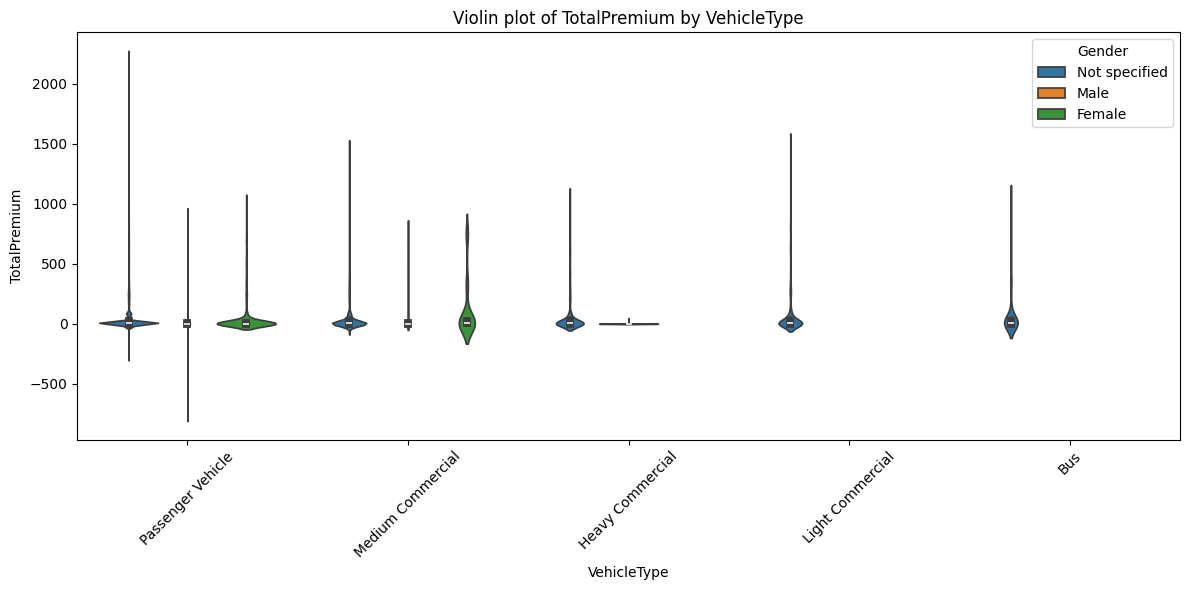

In [13]:
eda.plot_violin(x_col='VehicleType', y_col='TotalPremium', hue='Gender')

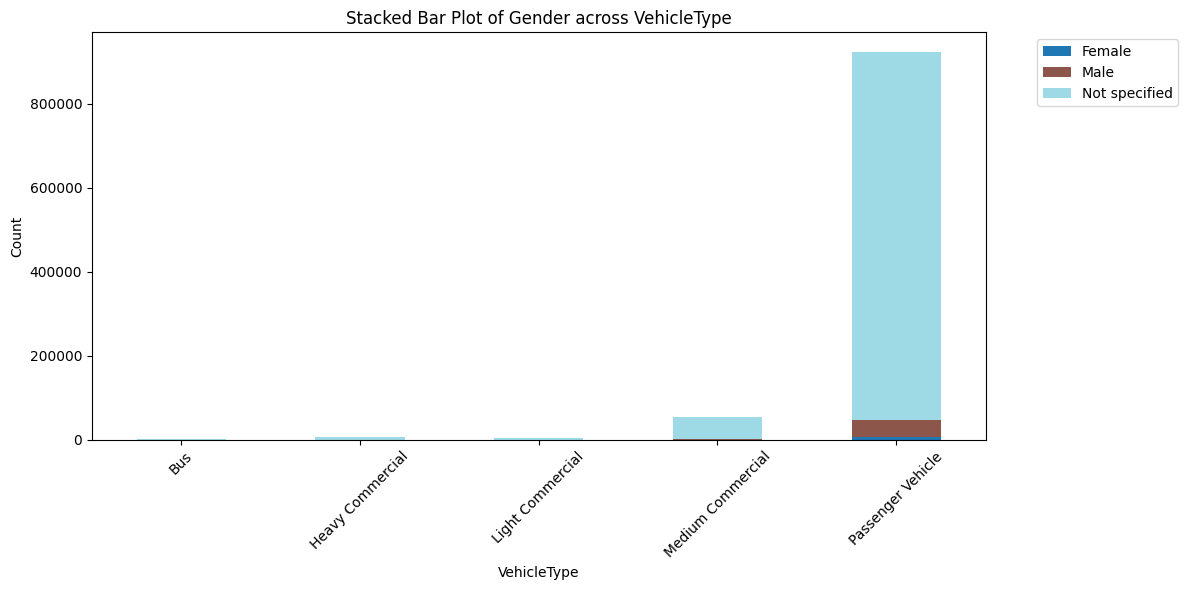

In [14]:
eda.plot_stacked_bar(x_col='VehicleType', y_col='TotalPremium', hue_col='Gender')

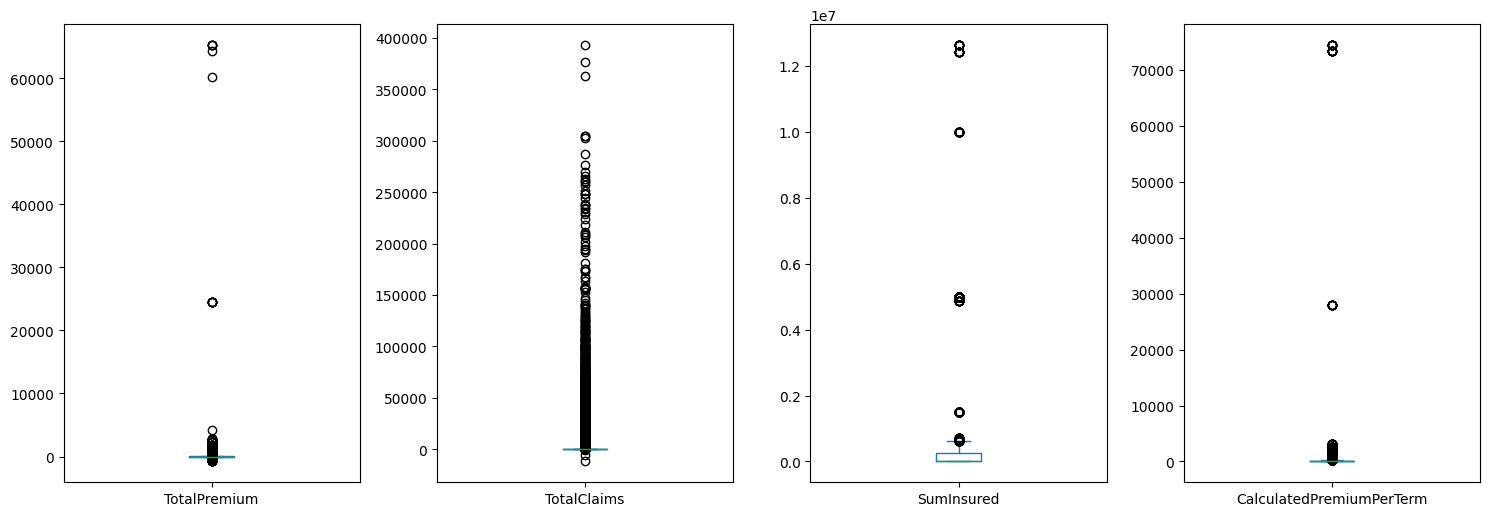

In [19]:
eda.plot_box(columns=['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm'])

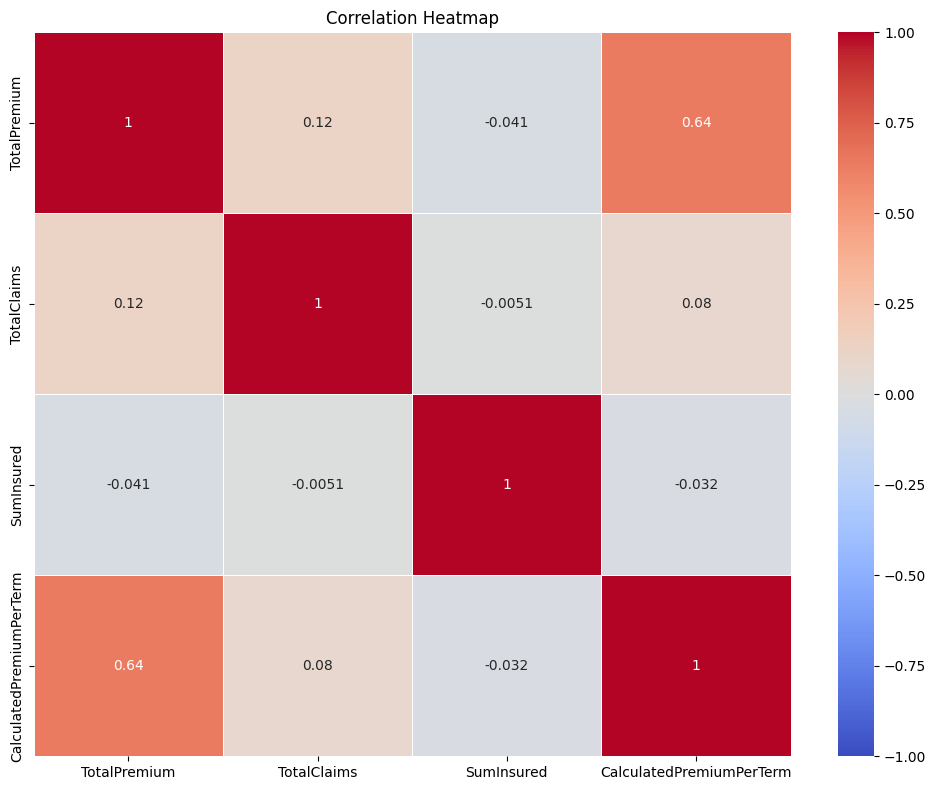

In [18]:
subset_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
eda.plot_correlation_heatmap(subset_columns=subset_columns)